In [2]:
import IPython
import sys
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [3]:
df = pd.read_csv('C:/Users/jiaqi/Downloads/subscriptionsdataFINAL.csv')
#Converting to datetime
df['Join Date'] =  pd.to_datetime(df['Join Date'].str.upper(), format='%b-%y', yearfirst=False)
df['End Date'] =  pd.to_datetime(df['End Date'].str.upper(), format='%b-%y', yearfirst=False)
df['join_year'] = df['Join Date'].dt.year

In [11]:
#Calculating Active members
date_min = min (df['Join Date'].min(),df['End Date'].min() )
date_max = max (df['Join Date'].max(),df['End Date'].max() )
all_dates = pd.date_range(date_min, date_max, freq = 'Y')
df['End Date'] = df['End Date'].fillna(date_max)
df[all_dates] = pd.concat([((df['Join Date'] <= i) & (i <= df['End Date'])).astype(int) for i in all_dates], axis=1)

In [7]:
#Duration Calculation
date_min = min (df['Join Date'].min(),df['End Date'].min() )
date_max = max (df['Join Date'].max(),df['End Date'].max() )
dates = pd.date_range(date_min, date_max, freq = 'MS')
df['Duration'] = np.where(df['End Date'].isna(), 
                                     (date_max - df['Join Date']), 
                                     (df['End Date'] - df['Join Date']) )
df['Duration'] = (df['Duration'] /  np.timedelta64(1, 'M') ).apply(math.floor)
df

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,Duration
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992,2011,0,0,0,0,0,0,0,0,0,0
1,Greenwich,2018-06-01,A,Female,Standard,2018-12-01,2,1972,2018,0,0,0,0,0,0,0,0,0,6
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985,2018,0,0,0,0,0,0,0,0,0,7
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972,2015,0,0,0,0,0,0,0,0,0,2
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850028,Lewisham,2018-12-01,A,Male,Standard,2018-12-01,850029,1995,2018,0,0,0,0,0,0,0,0,0,0
850029,Tower Hamlets,2013-10-01,B,Male,Standard,2014-02-01,850030,1987,2013,0,0,0,0,1,0,0,0,0,4
850030,Redbridge,2018-05-01,C1,Female,Standard,2018-09-01,850031,1985,2018,0,0,0,0,0,0,0,0,0,4
850031,Camden,2017-07-01,B,Female,Standard,2017-09-01,850032,1978,2017,0,0,0,0,0,0,0,0,0,2


In [66]:
#Classigying age
df['age'] = df['join_year'] - df['BirthYear'] 
def classify_age(age):
    if   18 <=age<=24:
        return '18-24'
    elif 25<= age <=30:
        return '25-30'
    elif 31 <= age <= 40:
        return '31-40'
    else:
        return '41-60'
    
df['agerange'] = df['age'].apply(lambda x : classify_age(x))
df

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,2009-12-31 00:00:00,...,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,Duration,age,agerange,year
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992,2011,0,...,0,0,0,0,0,0,0,19,18-24,2011
1,Greenwich,2018-06-01,A,Female,Standard,2018-12-01,2,1972,2018,0,...,0,0,0,0,0,0,6,46,41-60,2018
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985,2018,0,...,0,0,0,0,0,0,7,33,31-40,2018
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972,2015,0,...,0,0,0,0,0,0,2,43,41-60,2015
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,...,0,0,0,0,0,0,7,33,31-40,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850028,Lewisham,2018-12-01,A,Male,Standard,2018-12-01,850029,1995,2018,0,...,0,0,0,0,0,0,0,23,18-24,2018
850029,Tower Hamlets,2013-10-01,B,Male,Standard,2014-02-01,850030,1987,2013,0,...,0,1,0,0,0,0,4,26,25-30,2013
850030,Redbridge,2018-05-01,C1,Female,Standard,2018-09-01,850031,1985,2018,0,...,0,0,0,0,0,0,4,33,31-40,2018
850031,Camden,2017-07-01,B,Female,Standard,2017-09-01,850032,1978,2017,0,...,0,0,0,0,0,0,2,39,31-40,2017


# Customer Profile 

Text(0.5, 1.0, 'Active Members by age')

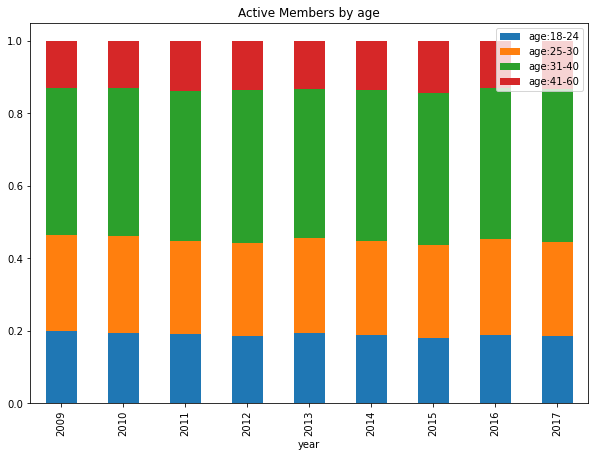

In [69]:
#Age
df_age=df.groupby('agerange')[all_dates].sum().T
df_age1=df_age.reset_index()
df_age1['year'] = df_age1['index'].dt.year
df_age2=df_age1.drop(columns=('index'), axis=1)
plot_age=df_age2.set_index('year')
plot_age['age:18-24']=plot_age['18-24'] / plot_age.sum(axis=1)
plot_age['age:25-30']=plot_age['25-30'] / plot_age.sum(axis=1)
plot_age['age:31-40']=plot_age['31-40'] / plot_age.sum(axis=1)
plot_age['age:41-60']=plot_age['41-60'] / plot_age.sum(axis=1)
plot_age
plot_age.loc[:,['age:18-24','age:25-30','age:31-40', 'age:41-60']].plot.bar(stacked=True, figsize=(10,7))
leg = plt.legend( loc = 'upper right')
plt.title('Active Members by age')

Text(0.5, 1.0, 'Active Members by Gender')

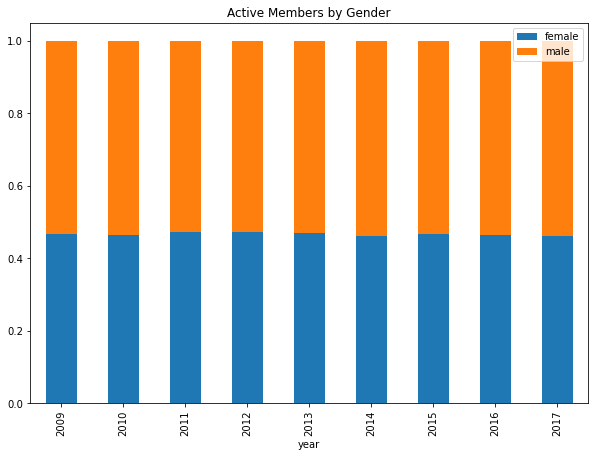

In [88]:
#Gender
df_g=df.groupby('Gender')[all_dates].sum().T
df_g1=df_g.reset_index()
df_g1['year'] = df_g1['index'].dt.year
df_g2=df_g1.drop(columns=('index'), axis=1)
plot_g=df_g2.set_index('year')
plot_g['female']=plot_g['Female'] / plot_g.sum(axis=1)
plot_g['male']=plot_g['Male'] / plot_g.sum(axis=1)
plot_g
plot_g.loc[:,['female','male']].plot.bar(stacked=True, figsize=(10,7))
leg = plt.legend( loc = 'upper right')
plt.title('Active Members by Gender')

Text(0.5, 1.0, 'Active Members by Affluence')

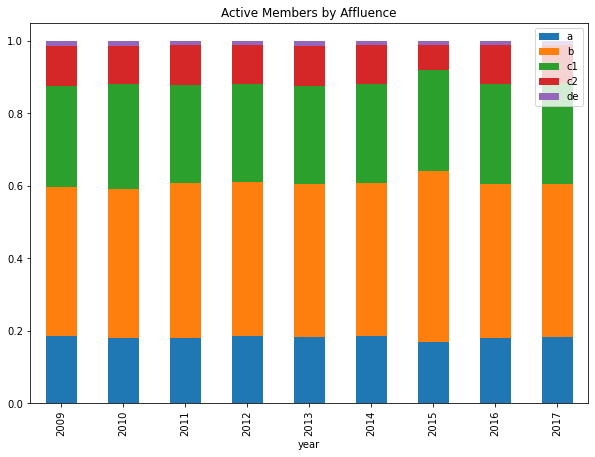

In [86]:
#Affluence
df_a=df.groupby('Affluence')[all_dates].sum().T
df_a1=df_a.reset_index()
df_a1['year'] = df_a1['index'].dt.year
df_a2=df_a1.drop(columns=('index'), axis=1)
plot_a=df_a2.set_index('year')
plot_a['a']=plot_a['A'] / plot_a.sum(axis=1)
plot_a['b']=plot_a['B'] / plot_a.sum(axis=1)
plot_a['c1']=plot_a['C1'] / plot_a.sum(axis=1)
plot_a['c2']=plot_a['C2'] / plot_a.sum(axis=1)
plot_a['de']=plot_a['DE'] / plot_a.sum(axis=1)

plot_a.loc[:,['a','b','c1','c2','de']].plot.bar(stacked=True, figsize=(10,7))
leg = plt.legend( loc = 'upper right')
plt.title('Active Members by Affluence')

Text(0.5, 1.0, 'Active Members by Subscription Type')

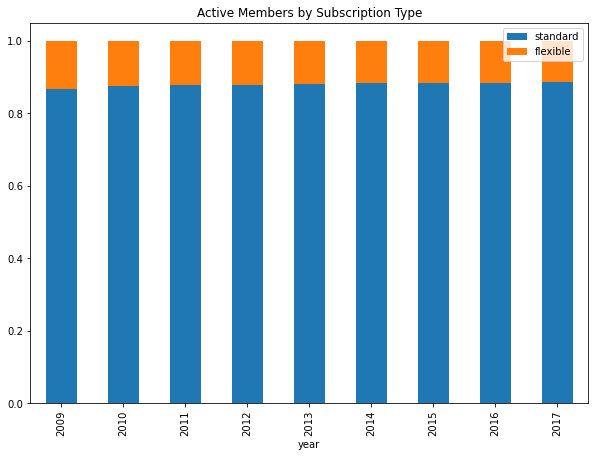

In [92]:
#Subscription Type:
#Affluence
df_c=df.groupby('Subscription Type')[all_dates].sum().T
df_c1=df_c.reset_index()
df_c1['year'] = df_c1['index'].dt.year
df_c2=df_c1.drop(columns=('index'), axis=1)
plot_c=df_c2.set_index('year')
plot_c['standard']=plot_c['Standard'] / plot_c.sum(axis=1)
plot_c['flexible']=plot_c['Flexible'] / plot_c.sum(axis=1)
plot_c.loc[:,['standard','flexible']].plot.bar(stacked=True, figsize=(10,7))
leg = plt.legend( loc = 'upper right')
plt.title('Active Members by Subscription Type')

In [96]:
#Visitation data part 1
df1 = pd.read_csv('C:/Users/jiaqi/Downloads/visitationdataPART1.csv')

In [97]:
#Visitation data part 2
df2 = pd.read_csv('C:/Users/jiaqi/Downloads/visitationdataPART2.csv')

In [98]:
#Joining visitation files
visitdf = pd.concat([df1, df2], axis=0, join='inner')
#Changing vsitdate to datetime
visitdf['visitdate'] =  pd.to_datetime(visitdf['visitdate'].str.upper(), format='%d/%m/%Y', yearfirst=False)
visitdf

,CustomerID,visitdate,TimeofVisit,peakvisits
0,126444,2009-05-01,05:45,False
1,456610,2009-05-01,05:45,False
2,293763,2009-05-01,06:00,False
3,151253,2009-05-01,06:15,False
4,476569,2009-05-01,06:15,False
...,...,...,...,...
1048570,443779,2015-09-27,08:45,True
1048571,114663,2015-09-27,08:45,True
1048572,290981,2015-09-27,08:45,True
1048573,20102,2015-09-27,08:45,True


In [183]:
df1=pd.merge( left= df, right= visitdf, left_on='CustomerID', right_on='CustomerID')

In [100]:
#Classigying type of customer
def classify_type_of_customer(Duration):
    if Duration <= 3:
        return 'spur_of_the_moment'
    elif 3 <= Duration < 12:
        return 'normal_customer'
    else:
        return 'loyalty_customer'
    

df1['Type_of_Customer'] = df1['Duration'].apply(lambda x : classify_type_of_customer(x))
u = df1.select_dtypes(include=['datetime'])
df1[u.columns] = u.fillna(date_max)
df1

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,2009-12-31 00:00:00,...,2016-12-31 00:00:00,2017-12-31 00:00:00,Duration,age,agerange,year,visitdate,TimeofVisit,peakvisits,Type_of_Customer
0,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,...,0,0,7,33,31-40,2015,2015-08-19,17:00,False,normal_customer
1,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,...,0,0,7,33,31-40,2015,2015-08-22,08:15,True,normal_customer
2,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,...,0,0,7,33,31-40,2015,2015-08-30,18:15,True,normal_customer
3,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,...,0,0,7,33,31-40,2015,2015-08-31,08:45,True,normal_customer
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,...,0,0,7,33,31-40,2015,2015-09-02,07:45,True,normal_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994,2014,0,...,0,0,20,20,18-24,2014,2015-09-16,20:30,False,loyalty_customer
2097146,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994,2014,0,...,0,0,20,20,18-24,2014,2015-09-17,19:45,True,loyalty_customer
2097147,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994,2014,0,...,0,0,20,20,18-24,2014,2015-09-18,08:30,True,loyalty_customer
2097148,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994,2014,0,...,0,0,20,20,18-24,2014,2015-09-19,11:45,False,loyalty_customer


In [101]:
date_min = min (df['Join Date'].min(),df['End Date'].min() )
date_max = max (df['Join Date'].max(),df['End Date'].max() )
dates = pd.date_range(date_min, date_max, freq = 'MS')
customers_total = pd.DataFrame({'Date':dates})
customers_total.head(), customers_total.shape
df['Duration'] = np.where(df['End Date'].isna(), 
                                     (date_max - df['Join Date']), 
                                     (df['End Date'] - df['Join Date']) )
df['Duration'] = (df['Duration'] /  np.timedelta64(1, 'M') ).apply(math.floor)

In [103]:
members_count =  [0] * len(dates)
def add_count(join_date,duration, dates, members_count):
    index = (dates == join_date).argmax()
    for i in range(index,index + duration+1):
        members_count[i] = members_count[i] +1 
    return members_count
df.apply(lambda row: add_count(row['Join Date'], row['Duration'],
                                          dates, members_count), axis=1)

0         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
1         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
2         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
3         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
4         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
                                ...                        
850028    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850029    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850030    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850031    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850032    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
Length: 850033, dtype: object

In [ ]:
data = {"Date":dates,"Total_members":members_count}
members_count_by_month = pd.DataFrame(data)

## Exploring Behaviour of those who leave within 3 months

In [104]:
#Group by customers type group and peakvisits
visits= df1.groupby(['Type_of_Customer', 'peakvisits']).size().to_frame('Count').reset_index()
#Pivoting the data
pivot_df = visits.pivot(index= 'peakvisits', columns='Type_of_Customer', values='Count')

#Cacluating proportion of customer in each time that visits peak vs none peak
#pivot_df['loyal']= pivot_df['loyalty_customer'] / (pivot_df['loyalty_customer']+pivot_df['spur_of_the_moment']+ pivot_df['normal_customer'])
#pivot_df['normal']= pivot_df['normal_customer'] / (pivot_df['loyalty_customer']+pivot_df['spur_of_the_moment']+ pivot_df['normal_customer'])
#pivot_df['spur of the moment']= pivot_df['spur_of_the_moment'] / (pivot_df['loyalty_customer']+pivot_df['spur_of_the_moment']+ pivot_df['normal_customer'])
#pivot_df

In [ ]:
pivot_df.loc[:,['loyal','normal','spur of the moment']].plot.bar( figsize=(10,7))

In [57]:
#Filtering for total that visits in different time 
visittime= df1.groupby(['TimeofVisit']).size().to_frame('Count').reset_index()
visittime

,TimeofVisit,Count
0,00:00,3118
1,05:00,802
2,05:15,3968
3,05:30,6169
4,05:45,7141
...,...,...
72,22:45,13125
73,23:00,11129
74,23:15,8946
75,23:30,7270


In [59]:
#converting time to date time
#times = pd.to_datetime(visittime.TimeofVisit)
visittime['TimeofVisit'] = pd.to_datetime(visittime['TimeofVisit'])
df3=visittime.set_index('TimeofVisit')
df4=df3.resample('60min', label='right').first()
dff=df4.reset_index()
#Calculating times in terms of hour 
dff['time_hour'] = dff['TimeofVisit'].dt.hour
dff

,TimeofVisit,Count,time_hour
0,2021-01-22 01:00:00,3118.0,1
1,2021-01-22 02:00:00,NaN,2
2,2021-01-22 03:00:00,NaN,3
3,2021-01-22 04:00:00,NaN,4
4,2021-01-22 05:00:00,NaN,5
5,2021-01-22 06:00:00,802.0,6
6,2021-01-22 07:00:00,11036.0,7
7,2021-01-22 08:00:00,56814.0,8
8,2021-01-22 09:00:00,89231.0,9
9,2021-01-22 10:00:00,34561.0,10


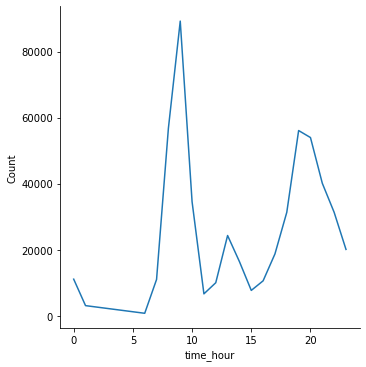

In [60]:
# Plot for total that visits in different hours 
sns.relplot(x="time_hour", y="Count", kind="line", data=dff)
plt.show()

In [61]:
# Visitation times by type of customer
visits= df1.groupby(['TimeofVisit', 'Type_of_Customer','Subscription Type']).size().to_frame('Count').reset_index()
visits['TimeofVisit'] = pd.to_datetime(visits['TimeofVisit'])
visits['time_hour'] = visits['TimeofVisit'].dt.hour
visits

,TimeofVisit,Type_of_Customer,Subscription Type,Count,time_hour
0,2021-01-22 00:00:00,loyalty_customer,Flexible,5,0
1,2021-01-22 00:00:00,loyalty_customer,Standard,344,0
2,2021-01-22 00:00:00,normal_customer,Flexible,144,0
3,2021-01-22 00:00:00,normal_customer,Standard,1649,0
4,2021-01-22 00:00:00,spur_of_the_moment,Flexible,214,0
...,...,...,...,...,...
457,2021-01-22 23:45:00,loyalty_customer,Standard,695,23
458,2021-01-22 23:45:00,normal_customer,Flexible,269,23
459,2021-01-22 23:45:00,normal_customer,Standard,3447,23
460,2021-01-22 23:45:00,spur_of_the_moment,Flexible,420,23


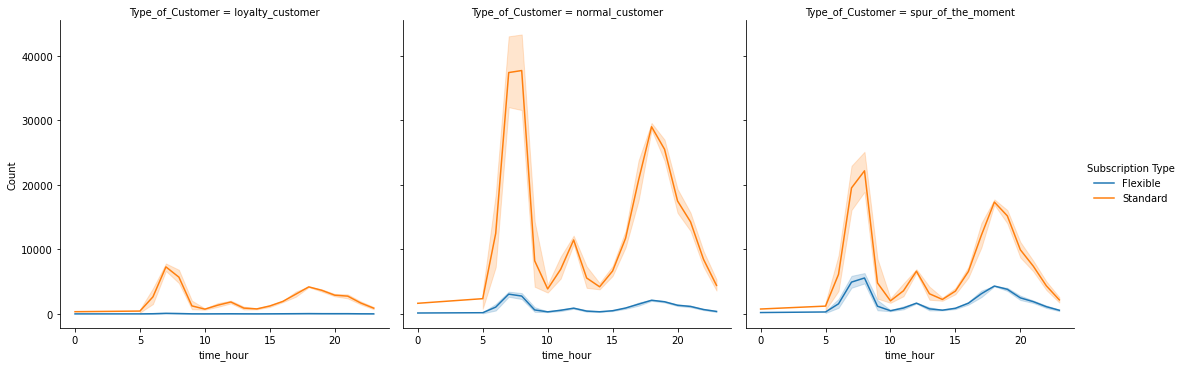

In [62]:
sns.relplot(x="time_hour", y="Count", hue="Subscription Type",col="Type_of_Customer", kind="line", data=visits)
plt.show()

In [109]:
df_leave = df1[df1['Duration'] <= 3]
df_leave

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,2009-12-31 00:00:00,...,2016-12-31 00:00:00,2017-12-31 00:00:00,Duration,age,agerange,year,visitdate,TimeofVisit,peakvisits,Type_of_Customer
16,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,0,...,0,0,3,25,25-30,2015,2015-08-16,19:00,True,spur_of_the_moment
17,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,0,...,0,0,3,25,25-30,2015,2015-08-17,19:15,True,spur_of_the_moment
18,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,0,...,0,0,3,25,25-30,2015,2015-08-20,07:45,True,spur_of_the_moment
19,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,0,...,0,0,3,25,25-30,2015,2015-08-21,17:45,False,spur_of_the_moment
20,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,0,...,0,0,3,25,25-30,2015,2015-08-23,12:30,True,spur_of_the_moment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097068,Newham,2015-07-01,B,Male,Flexible,2015-10-01,849996,1986,2015,0,...,0,0,3,29,25-30,2015,2015-09-15,16:45,False,spur_of_the_moment
2097069,Newham,2015-07-01,B,Male,Flexible,2015-10-01,849996,1986,2015,0,...,0,0,3,29,25-30,2015,2015-09-18,18:30,True,spur_of_the_moment
2097070,Newham,2015-07-01,B,Male,Flexible,2015-10-01,849996,1986,2015,0,...,0,0,3,29,25-30,2015,2015-09-20,12:45,True,spur_of_the_moment
2097071,Newham,2015-07-01,B,Male,Flexible,2015-10-01,849996,1986,2015,0,...,0,0,3,29,25-30,2015,2015-09-22,07:30,True,spur_of_the_moment


C:\Users\jiaqi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jiaqi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


peakvisits,False,True,offpeak,peak
Club,,,,
Barnet,6313,7102,0.470593,0.529407
Bexley,6991,8283,0.457706,0.542294
Brent,7602,9059,0.456275,0.543725
Camden,6131,7170,0.460943,0.539057
Croydon,6562,7659,0.461430,0.538570
Ealing,5403,6149,0.467711,0.532289
Enfield,18970,22597,0.456372,0.543628
Greenwich,74126,86956,0.460176,0.539824
Haringey,6169,7063,0.466218,0.533782


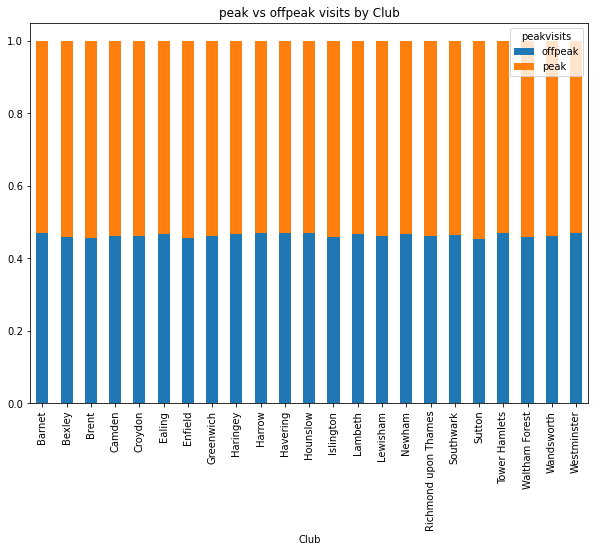

In [111]:
import calendar
df_leave['month'] = df_leave['visitdate'].dt.month
df_leave['year'] = df_leave['visitdate'].dt.year
dffreq=df_leave.groupby(['Club', 'peakvisits']).size().to_frame('Count').reset_index()
dffreq
pivotdata = dffreq.pivot(index= 'Club', columns='peakvisits', values='Count')
pivotdata['offpeak']= pivotdata[False]/ ( pivotdata[True] + pivotdata[False])
pivotdata['peak']=pivotdata[True]/ ( pivotdata[True] + pivotdata[False])
pivotdata.loc[:,['offpeak','peak']].plot.bar(stacked=True, figsize=(10,7))
plt.title('peak vs offpeak visits by Club')
pivotdata
#sns.catplot(x=)
#df.drop(df.columns[[0, 1, 3]], axis=1)
#pivotdata2.plot.bar(stacked=True, figsize=(10,7))

Text(0.5, 1.0, 'Monthly Visitation Distribution by Season')

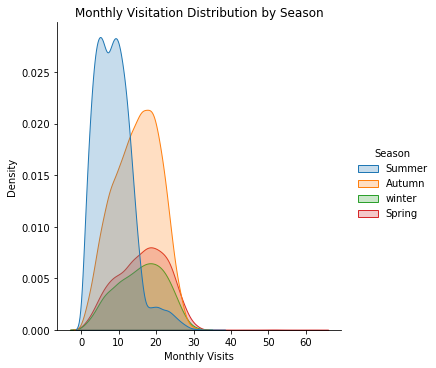

In [190]:
#Classigying season
df1['month'] = df1['visitdate'].dt.month
def classify_season(month):
    if  month==6 or month==7 or month==8:
        return 'Summer'
    elif month==9 or month==10 or month==11:
        return 'Autumn'
    elif month==12 or month==1 or month==2:
        return 'winter'
    else:
        return 'Spring'
    
df1['Season'] = df1['month'].apply(lambda x : classify_season(x))
freq=df1.groupby(['CustomerID','month','Season']).size().to_frame('Monthly Visits').reset_index()
freq
sns.displot(freq, x="Monthly Visits",hue='Season',kind="kde", bw_adjust=1.5, fill=True)
plt.title('Monthly Visitation Distribution by Season')

In [158]:
df['month'] = df['Join Date'].dt.month
def classify_season(month):
    if  month==6 or month==7 or month==8:
        return 'Summer'
    elif month==9 or month==10 or month==11:
        return 'Autumn'
    elif month==12 or month==1 or month==2:
        return 'winter'
    else:
        return 'Spring'
    
df['Season'] = df['month'].apply(lambda x : classify_season(x))
df

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,2009-12-31 00:00:00,...,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,Duration,age,agerange,year,month,Season
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992,2011,0,...,0,0,0,0,0,19,18-24,2011,12,winter
1,Greenwich,2018-06-01,A,Female,Standard,2018-12-01,2,1972,2018,0,...,0,0,0,0,6,46,41-60,2018,6,Summer
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985,2018,0,...,0,0,0,0,7,33,31-40,2018,3,Spring
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972,2015,0,...,0,0,0,0,2,43,41-60,2015,10,Autumn
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,...,0,0,0,0,7,33,31-40,2015,5,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850028,Lewisham,2018-12-01,A,Male,Standard,2018-12-01,850029,1995,2018,0,...,0,0,0,0,0,23,18-24,2018,12,winter
850029,Tower Hamlets,2013-10-01,B,Male,Standard,2014-02-01,850030,1987,2013,0,...,0,0,0,0,4,26,25-30,2013,10,Autumn
850030,Redbridge,2018-05-01,C1,Female,Standard,2018-09-01,850031,1985,2018,0,...,0,0,0,0,4,33,31-40,2018,5,Spring
850031,Camden,2017-07-01,B,Female,Standard,2017-09-01,850032,1978,2017,0,...,0,0,0,0,2,39,31-40,2017,7,Summer


Text(0.5, 1.0, 'New memberships by Season')

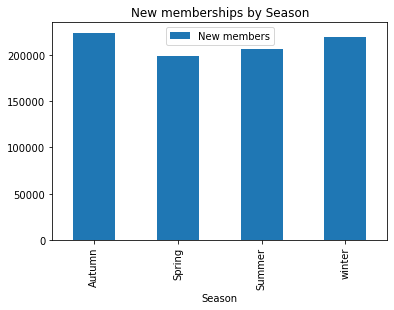

In [147]:
freq=df.groupby(['month','Season']).size().to_frame('New members').reset_index()
df1=freq.groupby(['Season']).sum().reset_index()
df1.plot.bar(x='Season', y='New members')
plt.title('New memberships by Season')

In [159]:
df['month'] = df['End Date'].dt.month
def classify_season(month):
    if  month==6 or month==7 or month==8:
        return 'Summer'
    elif month==9 or month==10 or month==11:
        return 'Autumn'
    elif month==12 or month==1 or month==2:
        return 'winter'
    else:
        return 'Spring'
    
df['Season'] = df['month'].apply(lambda x : classify_season(x))
df

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,2009-12-31 00:00:00,...,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,Duration,age,agerange,year,month,Season
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992,2011,0,...,0,0,0,0,0,19,18-24,2011,12,winter
1,Greenwich,2018-06-01,A,Female,Standard,2018-12-01,2,1972,2018,0,...,0,0,0,0,6,46,41-60,2018,12,winter
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985,2018,0,...,0,0,0,0,7,33,31-40,2018,10,Autumn
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972,2015,0,...,0,0,0,0,2,43,41-60,2015,12,winter
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,0,...,0,0,0,0,7,33,31-40,2015,12,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850028,Lewisham,2018-12-01,A,Male,Standard,2018-12-01,850029,1995,2018,0,...,0,0,0,0,0,23,18-24,2018,12,winter
850029,Tower Hamlets,2013-10-01,B,Male,Standard,2014-02-01,850030,1987,2013,0,...,0,0,0,0,4,26,25-30,2013,2,winter
850030,Redbridge,2018-05-01,C1,Female,Standard,2018-09-01,850031,1985,2018,0,...,0,0,0,0,4,33,31-40,2018,9,Autumn
850031,Camden,2017-07-01,B,Female,Standard,2017-09-01,850032,1978,2017,0,...,0,0,0,0,2,39,31-40,2017,9,Autumn


,Season,month,Cancellations
0,Autumn,30,205293
1,Spring,12,194795
2,Summer,21,200316
3,winter,15,249629


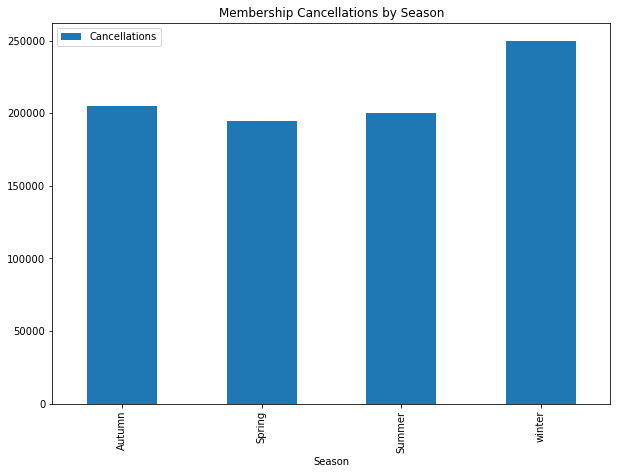

In [160]:
freq=df.groupby(['month','Season']).size().to_frame('Cancellations').reset_index()
df1=freq.groupby(['Season']).sum().reset_index()
df1.plot.bar(x='Season', y='Cancellations', figsize=(10,7))
plt.title('Membership Cancellations by Season')
df1

In [163]:
# Visitation time by Gender
gender= df_leave.groupby(['TimeofVisit', 'Gender']).size().to_frame('Count').reset_index()
gender['TimeofVisit'] = pd.to_datetime(gender['TimeofVisit'])
gender['time_hour'] = gender['TimeofVisit'].dt.hour
gender

,TimeofVisit,Gender,Count,time_hour
0,2021-01-25 00:00:00,Female,460,0
1,2021-01-25 00:00:00,Male,516,0
2,2021-01-25 05:00:00,Female,158,5
3,2021-01-25 05:00:00,Male,154,5
4,2021-01-25 05:15:00,Female,614,5
...,...,...,...,...
149,2021-01-25 23:15:00,Male,1481,23
150,2021-01-25 23:30:00,Female,1165,23
151,2021-01-25 23:30:00,Male,1200,23
152,2021-01-25 23:45:00,Female,1043,23


Text(0.5, 1.0, 'Visitation Hour by Gender')

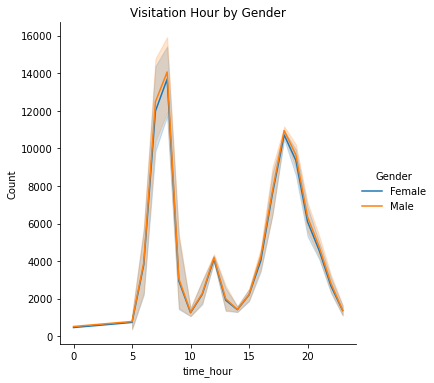

In [166]:
#plot
sns.relplot(x="time_hour", y="Count", hue="Gender", kind="line", data=gender)
plt.title('Visitation Hour by Gender')

In [168]:
#Visitation time by Affluence
aff= df_leave.groupby(['TimeofVisit', 'Affluence','Subscription Type']).size().to_frame('Count').reset_index()
aff['TimeofVisit'] = pd.to_datetime(aff['TimeofVisit'])
aff['time_hour'] = aff['TimeofVisit'].dt.hour
aff

,TimeofVisit,Affluence,Subscription Type,Count,time_hour
0,2021-01-25 00:00:00,A,Flexible,33,0
1,2021-01-25 00:00:00,A,Standard,120,0
2,2021-01-25 00:00:00,B,Flexible,84,0
3,2021-01-25 00:00:00,B,Standard,311,0
4,2021-01-25 00:00:00,C1,Flexible,70,0
...,...,...,...,...,...
764,2021-01-25 23:45:00,C1,Standard,450,23
765,2021-01-25 23:45:00,C2,Flexible,47,23
766,2021-01-25 23:45:00,C2,Standard,183,23
767,2021-01-25 23:45:00,DE,Flexible,9,23


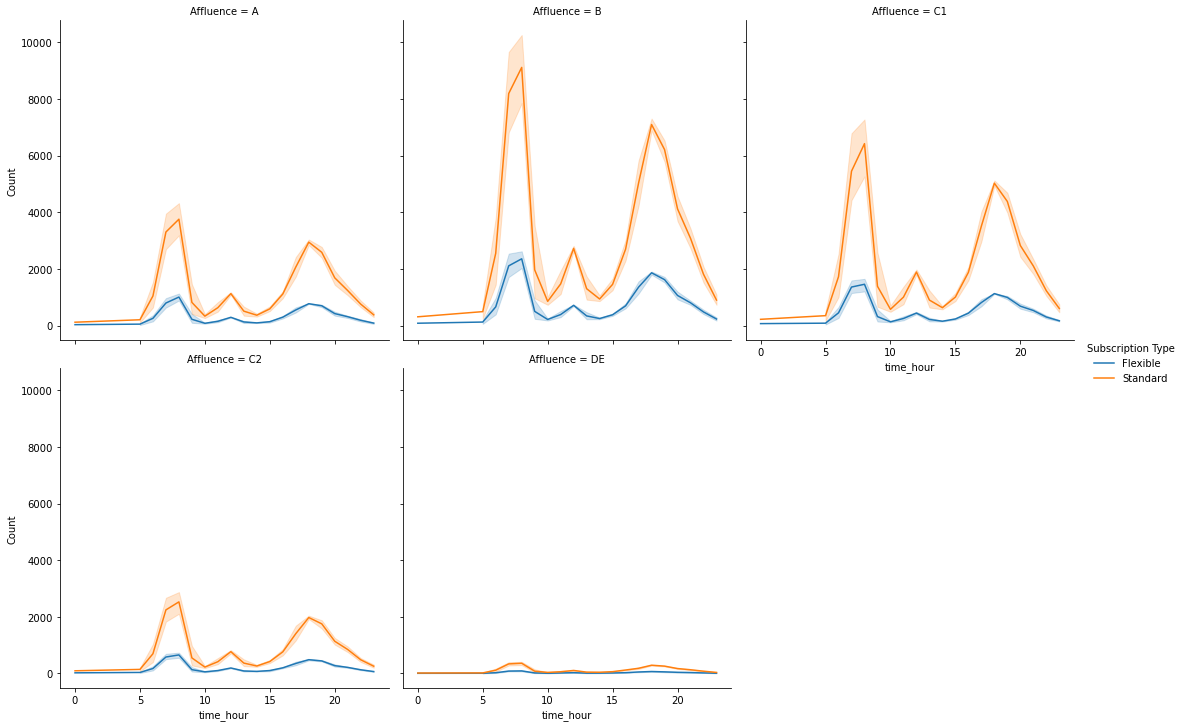

In [179]:
sns.relplot(x="time_hour", y="Count", hue="Subscription Type",col="Affluence", col_wrap=3,kind="line", data=aff)

In [180]:
#Visitation times by age
agedata= df_leave.groupby(['TimeofVisit', 'agerange','Subscription Type']).size().to_frame('Count').reset_index()
agedata['TimeofVisit'] = pd.to_datetime(agedata['TimeofVisit'])
agedata['time_hour'] = agedata['TimeofVisit'].dt.hour
agedata

,TimeofVisit,agerange,Subscription Type,Count,time_hour
0,2021-01-25 00:00:00,18-24,Flexible,38,0
1,2021-01-25 00:00:00,18-24,Standard,178,0
2,2021-01-25 00:00:00,25-30,Flexible,71,0
3,2021-01-25 00:00:00,25-30,Standard,216,0
4,2021-01-25 00:00:00,31-40,Flexible,76,0
...,...,...,...,...,...
611,2021-01-25 23:45:00,25-30,Standard,424,23
612,2021-01-25 23:45:00,31-40,Flexible,163,23
613,2021-01-25 23:45:00,31-40,Standard,640,23
614,2021-01-25 23:45:00,41-60,Flexible,43,23


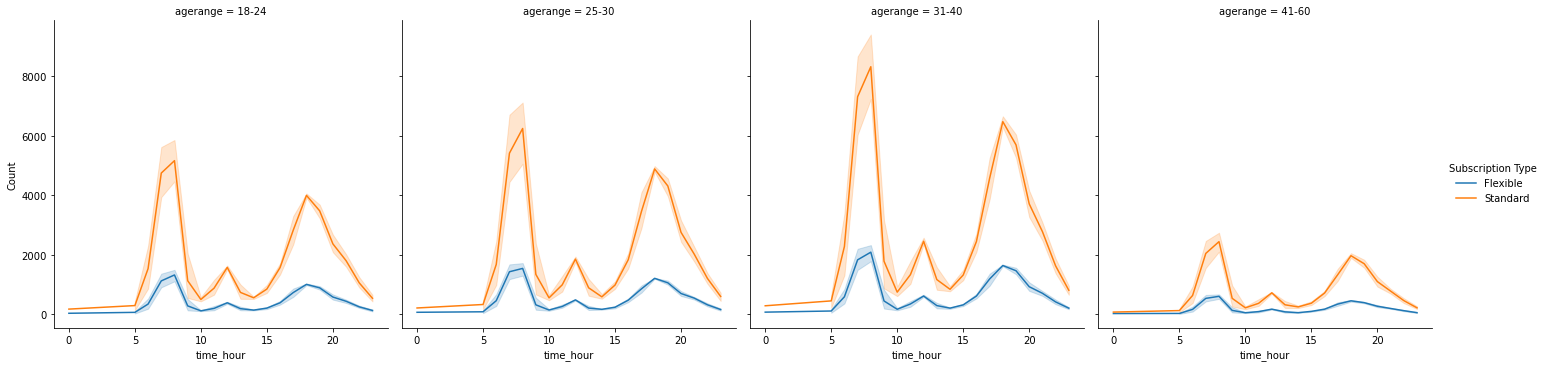

In [181]:
sns.relplot(x="time_hour", y="Count", hue="Subscription Type",col="agerange", kind="line", data=agedata)
plt.show()

# Duration Analysis

In [214]:
dff=df.groupby(['Join Date', 'Duration']).size().to_frame('Count').reset_index()
dff['year']=dff['Join Date'].dt.year
dff

,Join Date,Duration,Count,year
0,2009-05-01,0,48,2009
1,2009-05-01,1,22,2009
2,2009-05-01,2,183,2009
3,2009-05-01,3,142,2009
4,2009-05-01,4,87,2009
...,...,...,...,...
2550,2018-10-01,0,694,2018
2551,2018-10-01,1,409,2018
2552,2018-10-01,2,11652,2018
2553,2018-11-01,0,13084,2018


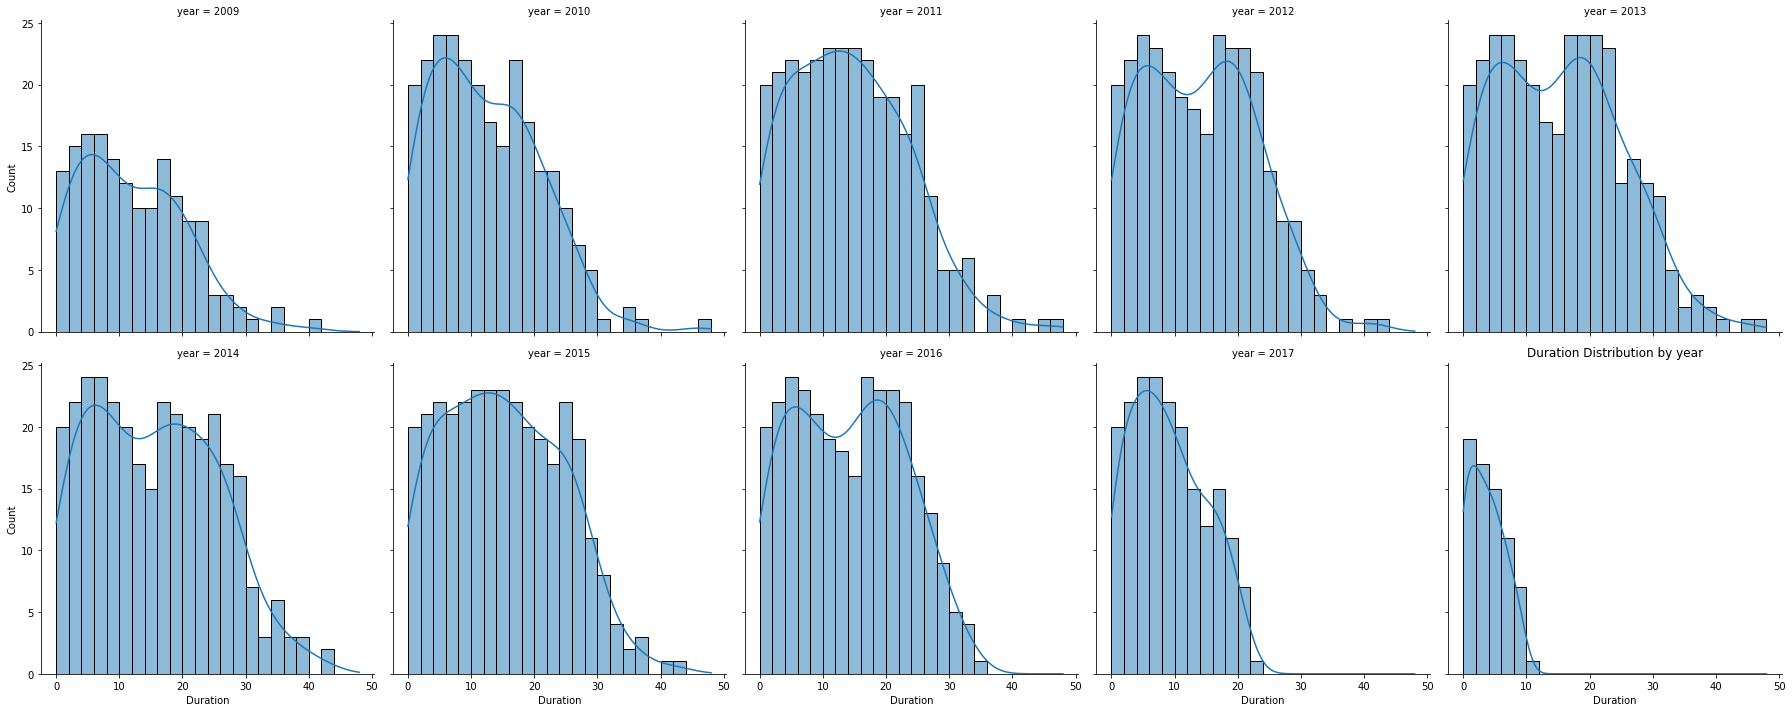

In [220]:
sns.displot(dff, x="Duration",kde=True, col='year',col_wrap=5)
plt.title('Duration Distribution by year')
plt.show()

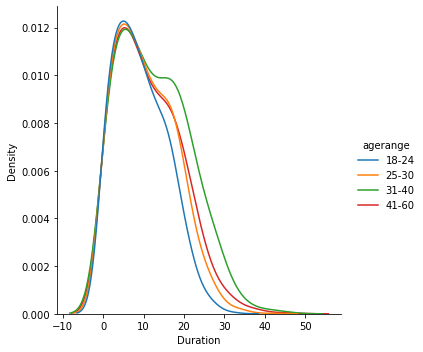

In [219]:
#Duration Distribution by age
dfa=df.groupby(['Join Date', 'Duration','agerange']).size().to_frame('Count').reset_index()
sns.displot(dfa, x="Duration",hue='agerange',kind="kde", bw_adjust=1.5)

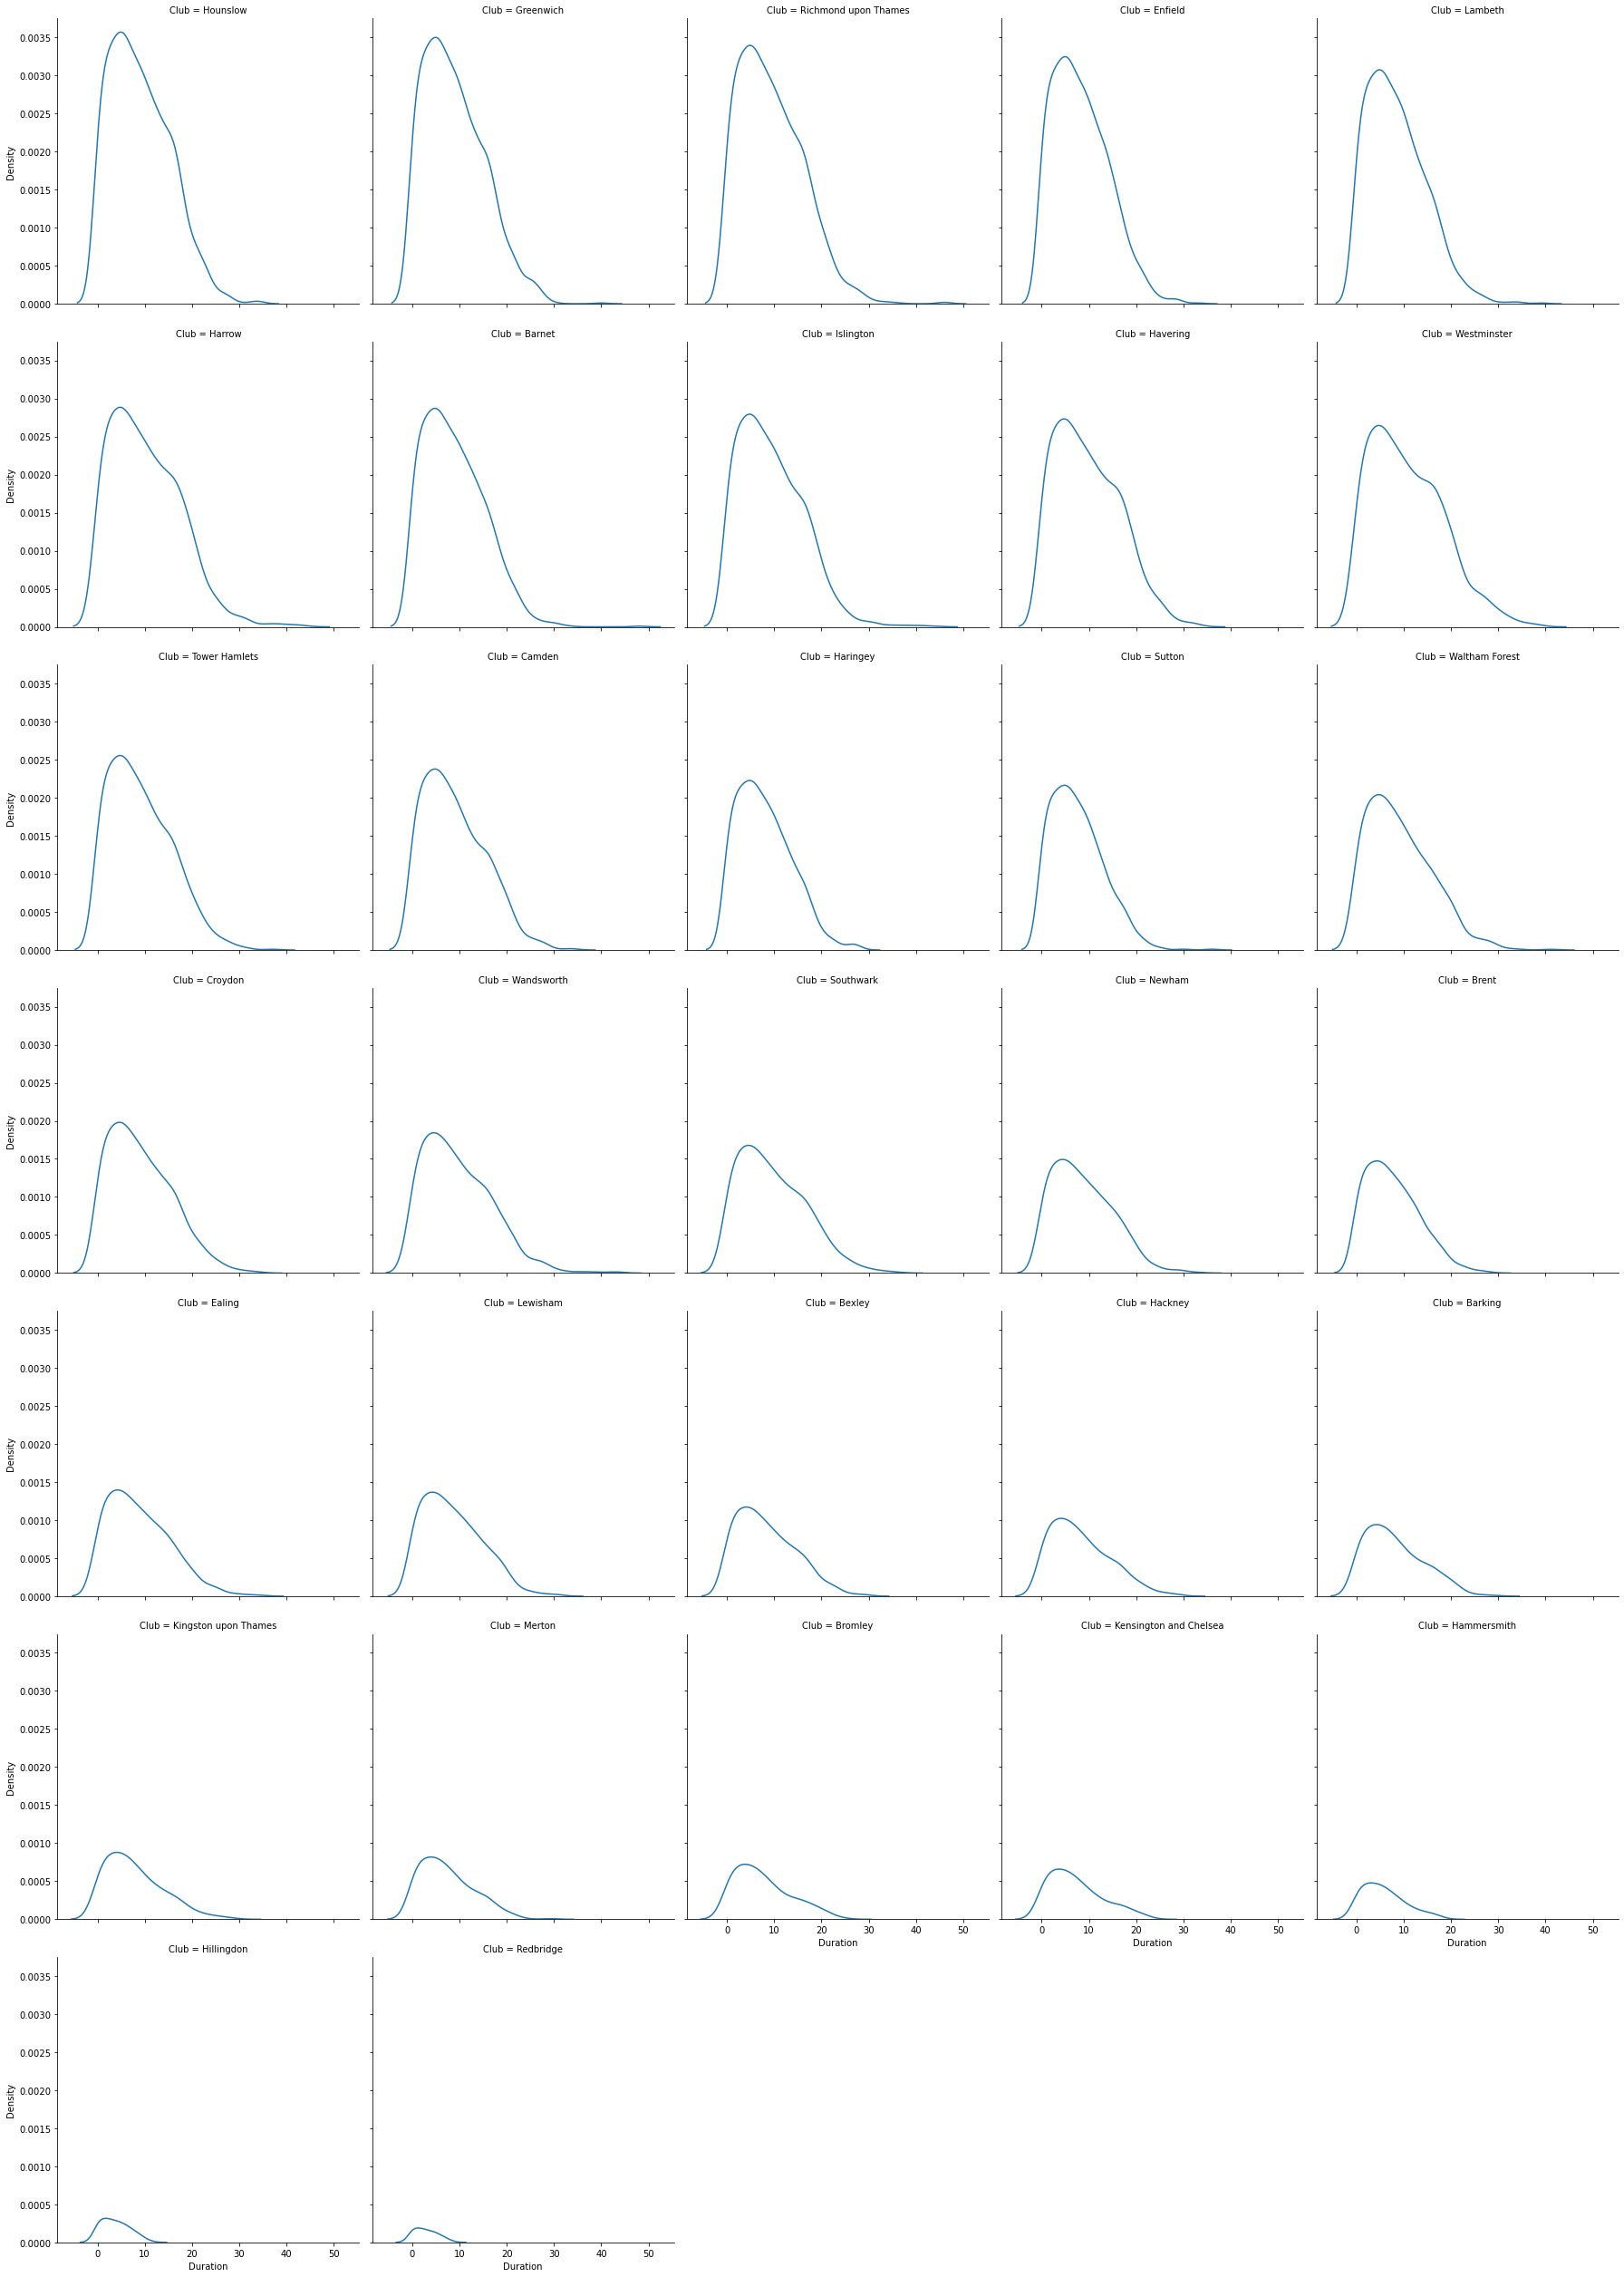

In [204]:
#Duration Distribution by Club
dfc=df.groupby(['Join Date', 'Duration','Club']).size().to_frame('Count').reset_index()
sns.displot(dfc, x="Duration",col="Club",kind="kde",col_wrap=5)

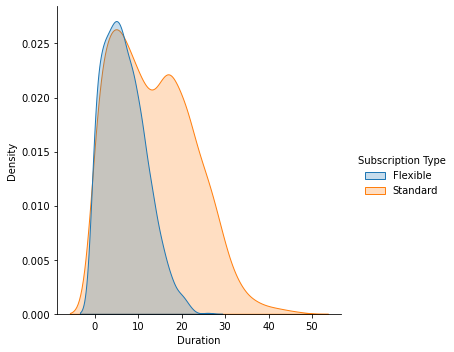

In [444]:
#Duration Distribution by sub type
dfs=df.groupby(['Join Date', 'Duration','Subscription Type']).size().to_frame('Count').reset_index()
sns.displot(dfs, x="Duration",hue= "Subscription Type",kind="kde",fill=True)

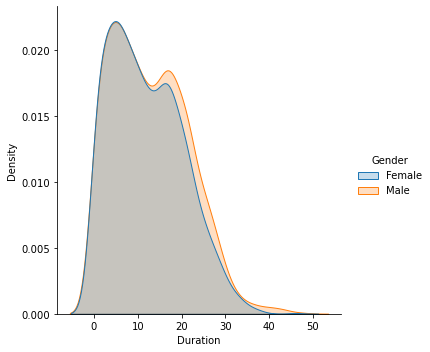

In [208]:
#Duration Disctribution by gender
dfg=df.groupby(['Join Date', 'Duration','Gender']).size().to_frame('Count').reset_index()
sns.displot(dfg, x="Duration",hue= "Gender",kind="kde",fill=True)

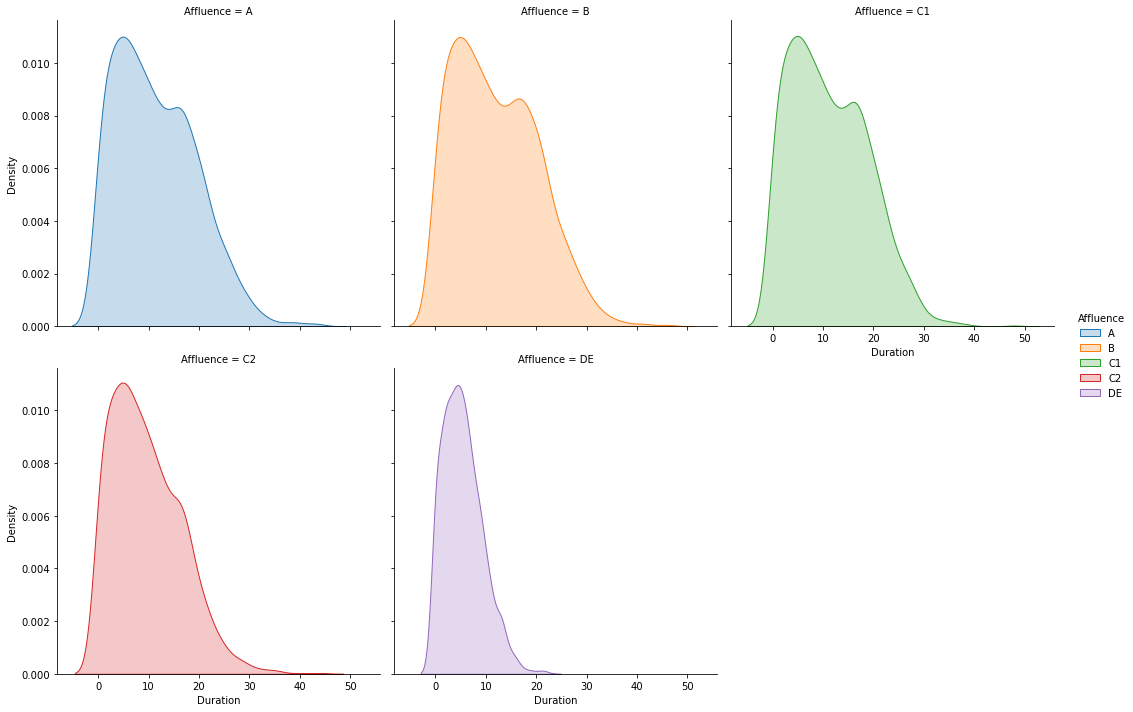

In [223]:
#Duration Distribution By Affluence Class
dfcl=df.groupby(['Join Date', 'Duration','Affluence']).size().to_frame('Count').reset_index()
sns.displot(dfcl, x="Duration",col= "Affluence",hue='Affluence',col_wrap=3,kind="kde", fill=True)

C:\Users\jiaqi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Members leaving within 3 months by Club ')

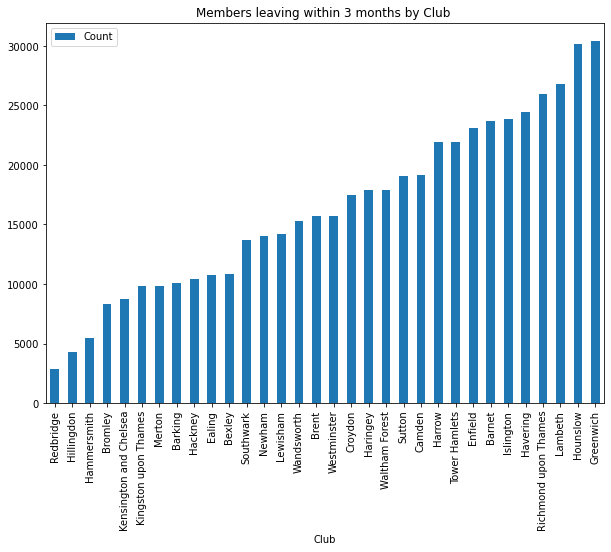

In [123]:
# leave within 3 months split by club
df_leave1 = df[df['Duration'] <= 3]
df_leave1['year'] = df_leave1['Join Date'].dt.year
df_data=df_leave1.groupby(['Club']).size().to_frame('Count').reset_index()
df_data1=df_data.groupby(['Club']).sum().reset_index()
df_data1 = df_data.sort_values('Count')
df_data1.plot.bar(x='Club',y='Count', figsize=(10,7))
plt.title('Members leaving within 3 months by Club ')

Text(0.5, 1.0, 'Members leaving within 3 months by Subscription Type')

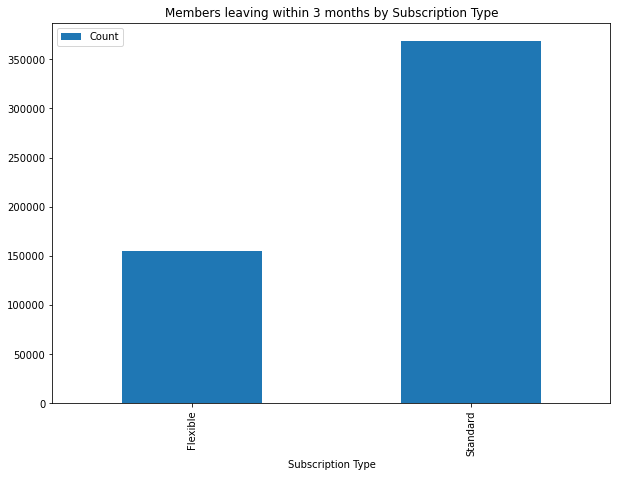

In [129]:
# leave within 3 months split by Subscription Type
df_data=df_leave1.groupby(['Subscription Type']).size().to_frame('Count').reset_index()
df_data=df_data.groupby(['Subscription Type']).sum().reset_index()
df_data.plot.bar(x='Subscription Type',y='Count', figsize=(10,7))
plt.title('Members leaving within 3 months by Subscription Type')

Text(0.5, 1.0, 'Members leaving within 3 months by Subscription Type')

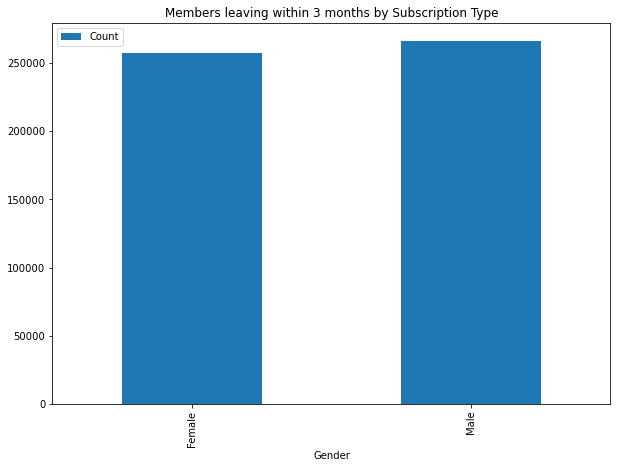

In [137]:
# Leave within 3 months by gender
df_data=df_leave1.groupby(['Gender']).size().to_frame('Count').reset_index()
df_data
df_data.plot.bar(x='Gender',y='Count', figsize=(10,7))
plt.title('Members leaving within 3 months by Subscription Type')

Text(0.5, 1.0, 'Members leaving within 3 months by age')

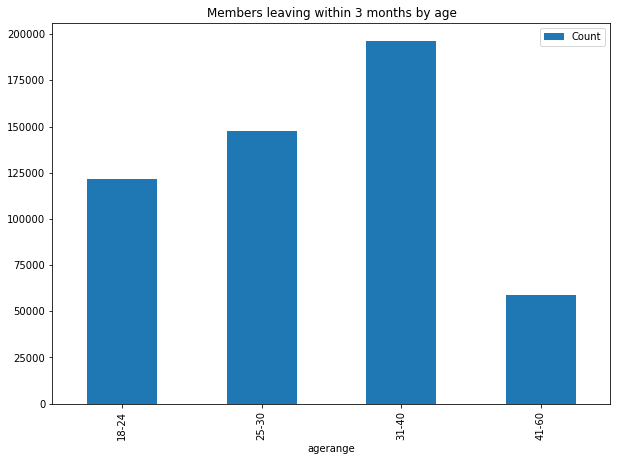

In [141]:
# Leave within3 months by age
df_data=df_leave1.groupby(['agerange']).size().to_frame('Count').reset_index()
df_data.plot.bar(x='agerange',y='Count', figsize=(10,7))
plt.title('Members leaving within 3 months by age')

Text(0.5, 1.0, 'Members leaving within 3 months by Affluence Class')

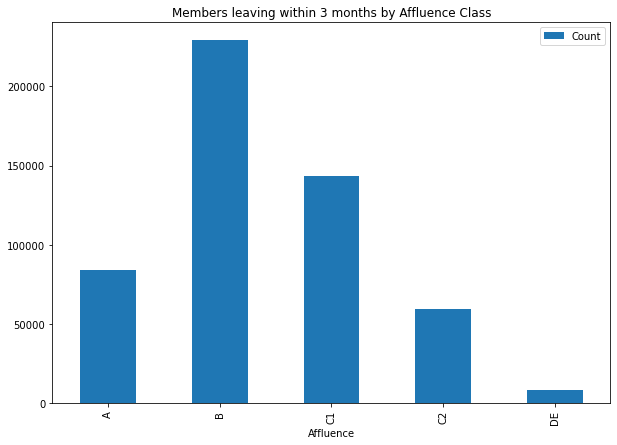

In [143]:
# Leave within 3 months by affluence
df_data=df_leave1.groupby(['Affluence']).size().to_frame('Count').reset_index()
df_data.plot.bar(x='Affluence',y='Count', figsize=(10,7))
plt.title('Members leaving within 3 months by Affluence Class')

0         False
1         False
2         False
3         False
4         False
          ...  
850028    False
850029    False
850030    False
850031    False
850032    False
Name: year, Length: 850033, dtype: bool

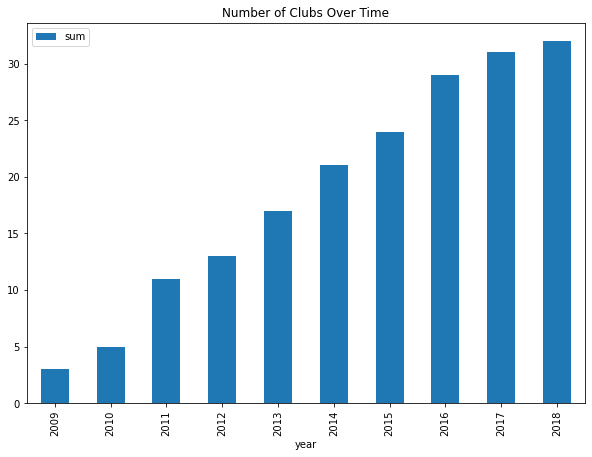

In [226]:
df['year'] = df['Join Date'].dt.year
df11=df.groupby(['Club','year']).size().to_frame('Count').reset_index()
df_club=df11.groupby(['Club','year']).size().to_frame('Count').reset_index()
pivotdata = df_club.pivot(index= 'year', columns='Club', values='Count')
pivotdata
pivotdata["sum"] = pivotdata.sum(axis=1)
plotdata=pivotdata.reset_index()
#pivot_df['Count']= pivot_df['Female'] / (pivot_df['Female']+pivot_df['Male'])
plotdata.plot.bar(x='year', y='sum', figsize=(10,7))
plt.title('Number of Clubs Over Time')